# Fake News Detection using Naïve Bayes
We have created a model to determine if a piece of news is fake or not, based on its title. We have used 4 Naïve Bayes algorithms, namely Gaussian, Bernoulli and Multinomial.

**About Dataset**

The dataset that we have used is from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and submitted by [Clément Bisaillon](https://www.kaggle.com/clmentbisaillon)

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The zip file contains two csv files


*   Fake.csv
*   True.csv

Both files contain 4 columns. Fake.csv contains 23481 rows and True.csv contains 21417 rows.

###About The Model
Naïve Bayes has proven to not only be simple but also fast, accurate, and reliable Machine Learning algorithm, that works really well with `Natural Language Processing (NLP)`-related problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Bayes Theorem**

Bayes Theorem is conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

![picture](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)
<center>Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html</center>

###Installing kaggle and importing datasets
We've installed kaggle on our Google Colab notebook and imported the dataset [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). 


In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/41.0M [00:00<?, ?B/s]
  2%|2         | 1.00M/41.0M [00:01<00:44, 934kB/s]
  5%|4         | 2.00M/41.0M [00:01<00:22, 1.82MB/s]
  7%|7         | 3.00M/41.0M [00:01<00:14, 2.78MB/s]
 10%|9         | 4.00M/41.0M [00:01<00:10, 3.76MB/s]
 12%|#2        | 5.00M/41.0M [00:01<00:08, 4.65MB/s]
 15%|#4        | 6.00M/41.0M [00:01<00:06, 5.43MB/s]
 17%|#7        | 7.00M/41.0M [00:01<00:06, 5.92MB/s]
 20%|#9        | 8.00M/41.0M [00:02<00:05, 6.43MB/s]
 22%|##1       | 9.00M/41.0M [00:02<00:04, 7.06MB/s]
 24%|##4       | 10.0M/41.0M [00:02<00:04, 7.17MB/s]
 27%|##6       | 11.0M/41.0M [00:02<00:04, 7.67MB/s]
 29%|##9       | 12.0M/41.0M [00:02<00:03, 7.60MB/s]
 32%|###1      | 13.0M/41.0M [00:02<00:03, 7.82MB/s]
 34%|###4      | 14.0M/41.0M [00:02<00:03, 7.87MB/s]
 37%|###6      | 15.0M/41.0M [00:03<00:03, 8.10MB/s]
 39%|###9      | 16.0M/41.0M [00:03<00:03, 7.83MB/s]
 41%|####1     | 17.0M/41.0M [00:03<00:03, 7.94MB/s]
 44%|####3     | 18.0M/41.0M [00:03<00:03, 7.91MB/s]
 4

After downloading the dataset, we have to unzip the zip file.

In [6]:
!unzip fake-and-real-news-dataset

'unzip' is not recognized as an internal or external command,
operable program or batch file.


###Importing All Dependencies

In [9]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [12]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

We have created two dataframes from the two CSV files that we have fetched from Kaggle.

In [13]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [14]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [15]:
fake.shape

(23481, 4)

In [16]:
true.shape

(21417, 4)

In [17]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the column `subject`, `date` and `text` as we do not require them.

In [18]:
fake.drop(['subject','date', 'text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 0 in all rows in a newly created column in Fake.csv file, using list comprehension.

In [19]:
fake['target'] = pd.Series([0 for x in range(len(fake.index))])

In [20]:
fake.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


Dropping the column `subject`, `date` and `text` as we do not require them.

In [21]:
true.drop(['subject','date','text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 1 in all rows in a newly created column in True.csv file, using list comprehension.

In [22]:
true['target'] = pd.Series([1 for x in range(len(true.index))])

In [23]:
true.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Due to our limitation in computing power, we cannot keep all the rows in the two files and instead keep only 5000 rows from each of the files.

In [24]:
true.drop(true.index[10000:], inplace=True)

In [25]:
true.shape

(10000, 2)

In [26]:
fake.drop(fake.index[10000:], inplace=True)

In [27]:
fake.shape

(10000, 2)

###Merging the two dataframes
Since, we now have target column inboth the files, we can merge them and create a new dataframe `data`

In [28]:
data = pd.concat([fake, true], ignore_index=True)

In [29]:
data.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [30]:
data.tail()

,title,target
19995,Obama says Clinton never jeopardized national ...,1
19996,U.S. plans to curb tax 'inversions' could hit ...,1
19997,U.S. Democrat Clinton downplays chance of cont...,1
19998,Boston Globe denounces Trump candidacy in 'fro...,1
19999,Lawyers evasive about ex-U.S. House speaker's ...,1


In [31]:
data.shape

(20000, 2)

We're going to shuffle the dataset to randomize our data resetting the `index`

In [32]:
data = data.sample(frac=1, random_state=1, ignore_index=True)

In [33]:
data.head()

,title,target
0,Pyongyang shown no interest in talks: State De...,1
1,Factbox: Contenders for senior jobs in Trump's...,1
2,Trump Just Claimed He Beat Obama In The Elect...,0
3,Mike Pence warns of 'consequences' if Russia h...,1
4,Russia Testimony Heats Up; Trump CLEANS HOUSE...,0


In [34]:
data.tail()

,title,target
19995,Trump administration does not want limits on w...,1
19996,Oil mogul Hamm tops Trump list for U.S. energy...,1
19997,D’oh!: Trump Tells Crowd In Richest County In...,0
19998,U.S. court strikes down two Republican-drawn T...,1
19999,GOP Lawmaker: Republicans Are Freaking Out Ab...,0


##Pre-processing
###Letter Case, Punctuation and Stopwords
Let's start by removing punctuations, making all the words lowercase and removing stopwords.

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\donfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
def process_text(s):
  # Check string to see if they are a punctuation
  nopunc = [char for char in s if char not in string.punctuation]
  # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
  # Convert string to lowercase and remove stopwords
  clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_string

In [37]:
data['title'] = data['title'].apply(process_text)

In [38]:
data.head(3)

,title,target
0,"[Pyongyang, shown, interest, talks, State, Dep...",1
1,"[Factbox, Contenders, senior, jobs, Trumps, ad...",1
2,"[Trump, Claimed, Beat, Obama, Election, Got, R...",0


In [39]:
# join the words into a string
data['title'] = data['title'].apply(lambda x: " ".join(x))

In [40]:
data.head(3)

,title,target
0,Pyongyang shown interest talks State Department,1
1,Factbox Contenders senior jobs Trumps administ...,1
2,Trump Claimed Beat Obama Election Got RIPPED A...,0


###Converting Strings into categorical values
As of now, we only have strings as our feature, which we must split into words and turn these words into categorical values. To do this, we used both `Count Vectorizer` and `TFIDF Vectorizer` saved in dataframes `data_cv` and `data_tv`. We'll use `GaussianNB` on `data_tv` and `BernoulliNB` and `MultinomialNB` on `data_cv`

In [41]:
#Using Count Vectorization
cv=CountVectorizer()
X_cv=cv.fit_transform(data.title).toarray()
#Using TFIDF Vectorization
tv=TfidfVectorizer()
X_tv=tv.fit_transform(data.title).toarray()

In [42]:
X_cv.shape

(20000, 15693)

In [43]:
X_tv.shape

(20000, 15693)

In [44]:
y = data[['target']]

###Splitting Train and Test Datasets

In [45]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.25, random_state=0)
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.25, random_state=0)

We're going to import `GaussianNB`,`BernoulliNB`, `MultinomialNB` and `ComplementNB` from `sklearn.naive_bayes`

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

###Fitting Our Train Data to the Models

In [47]:
gnb = GaussianNB()
y_pred_tv = gnb.fit(X_train_tv, y_train_tv).predict(X_test_tv)
print("Gaussian Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_tv, y_pred_tv))

c:\users\donfa\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gaussian Naïve Bayes Algorithm's Accuracy Score: 0.8396
Gaussian Naïve Bayes Algorithm's Precision Score: 0.8176534689429713
Gaussian Naïve Bayes Algorithm's Recall Score: 0.8823990591924735
Gaussian Naïve Bayes Algorithm's F1 Score: 0.8487933634992458


<Axes: >

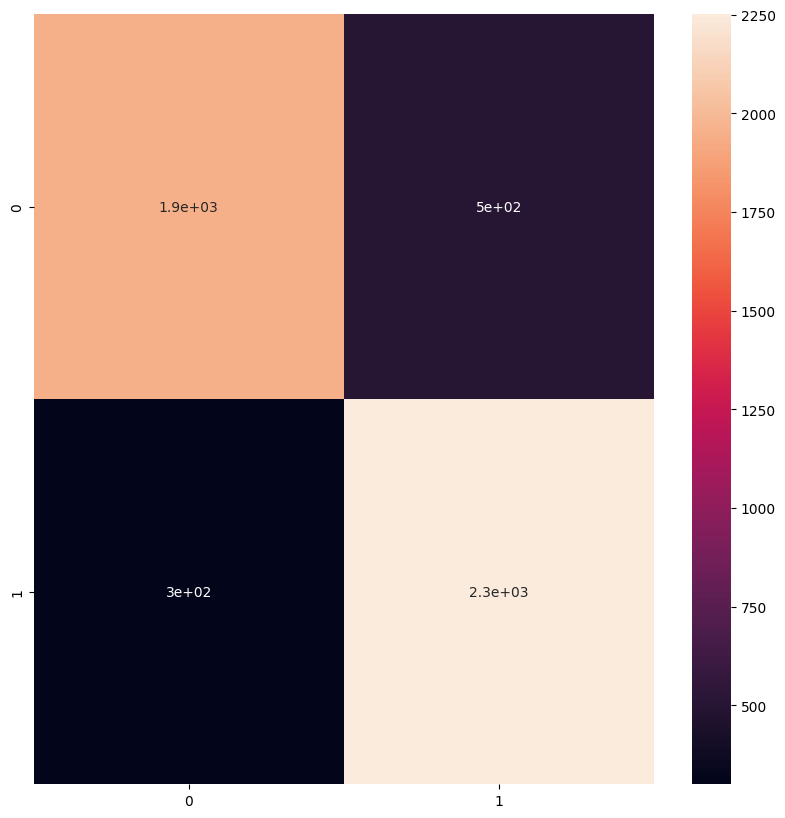

In [48]:
#Get the confusion matrix
cm_gnb = confusion_matrix(y_test_tv, y_pred_tv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_gnb, annot = True)

In [49]:
cm_gnb

array([[1947,  502],
       [ 300, 2251]], dtype=int64)

In [50]:
bnb = BernoulliNB()
y_pred_cv = bnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Bernoulli Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

c:\users\donfa\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naïve Bayes Algorithm's Accuracy Score: 0.9404
Bernoulli Naïve Bayes Algorithm's Precision Score: 0.9294700724361418
Bernoulli Naïve Bayes Algorithm's Recall Score: 0.955703645629165
Bernoulli Naïve Bayes Algorithm's F1 Score: 0.9424043293390028


<Axes: >

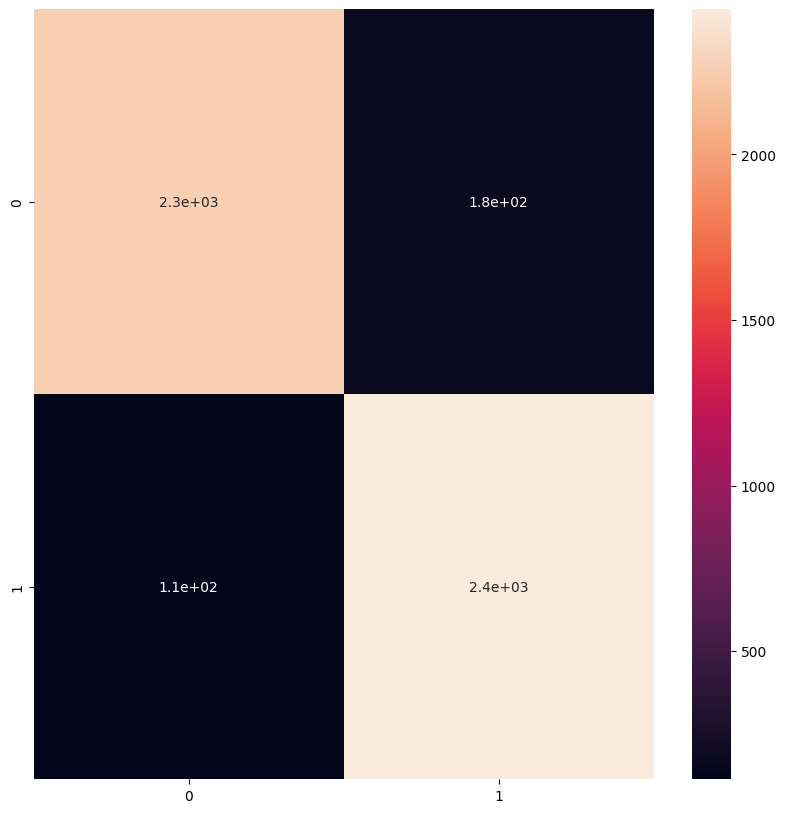

In [51]:
#Get the confusion matrix
cm_bnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_bnb, annot = True)

In [52]:
joblib.dump(bnb, 'bernoulli_naive_bayes_model.pkl')

['bernoulli_naive_bayes_model.pkl']

In [53]:
cm_bnb

array([[2264,  185],
       [ 113, 2438]], dtype=int64)

In [84]:
mnb = MultinomialNB()
y_pred_cv = mnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Multinomial Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

c:\users\donfa\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naïve Bayes Algorithm's Accuracy Score: 0.9368
Multinomial Naïve Bayes Algorithm's Precision Score: 0.9349941611521994
Multinomial Naïve Bayes Algorithm's Recall Score: 0.9415915327322618
Multinomial Naïve Bayes Algorithm's F1 Score: 0.93828125


<Axes: >

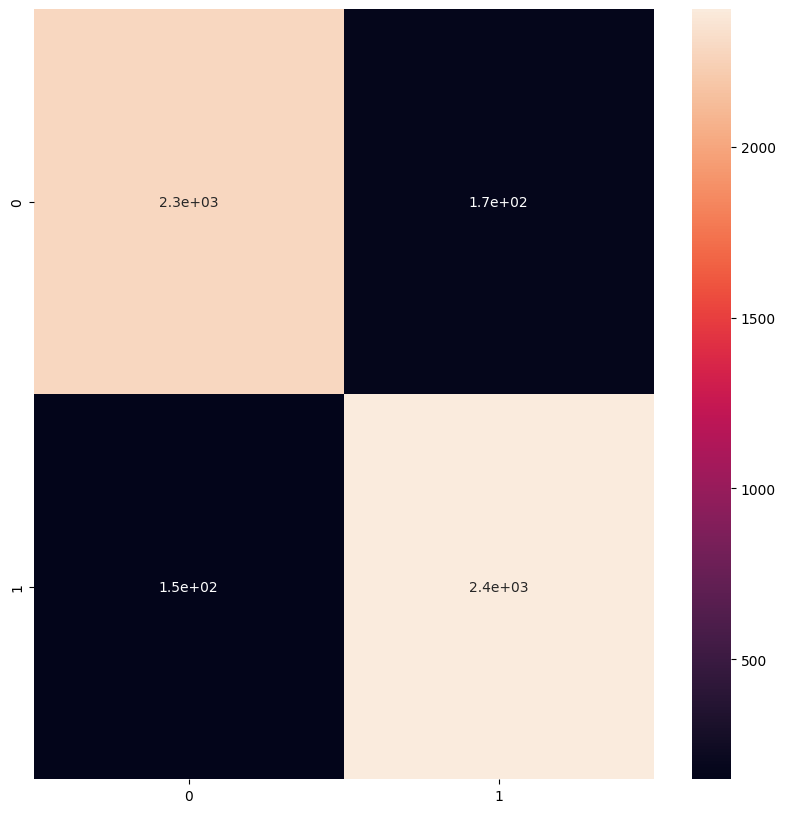

In [85]:
#Get the confusion matrix
cm_mnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_mnb, annot = True)

In [86]:
cm_mnb

array([[2282,  167],
       [ 149, 2402]], dtype=int64)

##Testing Headlines from Reuters (Real News)
[Link to the first news](https://www.reuters.com/world/us/bidens-supreme-court-pick-jackson-faces-us-senate-panel-vote-2022-04-04/)

[Link to the second news](https://www.reuters.com/business/russia-ukraine-fallout-starts-felling-fragile-frontier-economies-2022-04-04/)

In [87]:
#For testing
result = bnb.predict(cv.transform(["Two more Senate Republicans announce support for Supreme Court pick Jackson"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


In [88]:
#For testing
result = bnb.predict(cv.transform(["Analysis: Russia-Ukraine fallout starts felling fragile 'frontier' economies"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


##Testing Headlines from Politifact (Fake News)
[Link to the first news](https://www.politifact.com/factchecks/2022/apr/04/mike-gibbons/ohio-gop-candidate-falsely-says-more-votes-registe/)

[Link to the second news](https://www.politifact.com/factchecks/2022/mar/17/facebook-posts/persistent-high-gas-prices-dont-prove-price-gougin/)

In [89]:
#For testing
result = bnb.predict(cv.transform(["According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election."]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [90]:
#For testing
result = bnb.predict(cv.transform(["Comparing the price of oil and gas in June 2008 to March 2022 shows that oil companies are 'price gouging.'"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


##Conclusion and Limitations
We used 3 popular Naïve Bayes algorithms of `Scikit Learn` library - Gaussian, Bernoulli and Multinomial. The accuracy, precision, recall and f1 scores for all 3 algorithms are as follow: 

**Gaussian Naïve Bayes:**
* Accuracy (0.8416),
* Precision (0.8020244821092278),
* Recall (0.9075652637187) and
* F1 (0.8515371157210697)

**Bernoulli Naïve Bayes**
* Accuracy (0.9486666666666667),
* Precision (0.9420099711361847),
* Recall (0.9563132658497603) and
* F1 (0.9491077329808327)

**Multinomial Naïve Bayes**
* Accuracy (0.9426666666666667),
* Precision (0.946534121440086),
* Recall (0.9384656366542354) and
* F1 (0.9424826110219369)

Bernoulli Naïve Bayes is proven to be the most effective algorithm for detecting Fake News. Although Multinomial Naïve Bayes also performed very close to Bernoulli. As we can see in the testing, our model could successfully detect the fake news and the real news.

Due to some limitation in our computing capacity, we could not use all 44,898 rows and used 30,000 rows instead. This model can be tested on larger datasets.

